We first import some necessarily libraries.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from animate import animate

Now, I create a function to step a numpy array forward one Euler step.

In [2]:
def finite_diff_step(u: np.ndarray, f: callable, Δt: float):
    # Step u forward one timestep
    Δx = 2 / (len(u) - 1)

    for i in range(1, len(u) - 1):
        u[i] -= Δt / Δx * (f(u[i + 1]) - f(u[i - 1]))

    # Here we assume periodic
    u[0] -= Δt / Δx * (f(u[1]) - f(u[-1]))
    u[-1] -= Δt / Δx * (f(u[0]) - f(u[-2]))

We now initialize our solution.

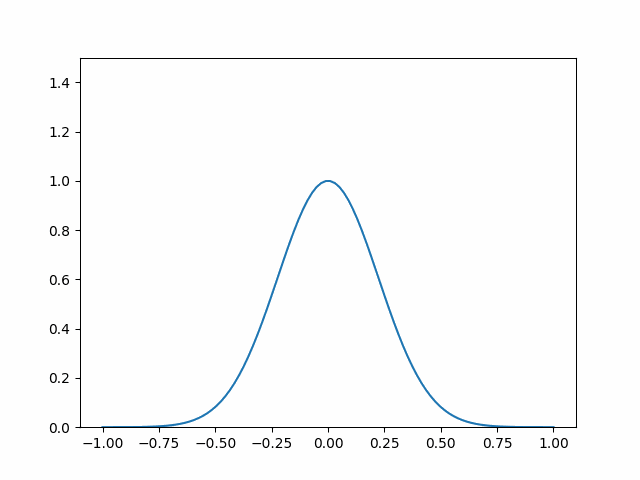

In [3]:
def u0(x: float) -> float:
    return np.exp(-10 * x ** 2)

u = u0(np.linspace(-1, 1, 100))

# Define an advection term
def f(x):
    return 5 * x

# Animate the solution
@animate
def animation():
    for i in range(50000):
        finite_diff_step(u, f, .00001)

        if i % 1000 == 0:
            plt.plot(np.linspace(-1, 1, 100), u)
            plt.ylim(0, 1.5)
            
            yield

animation()

We have a working constant term linear advection. Now, let's add a shock:

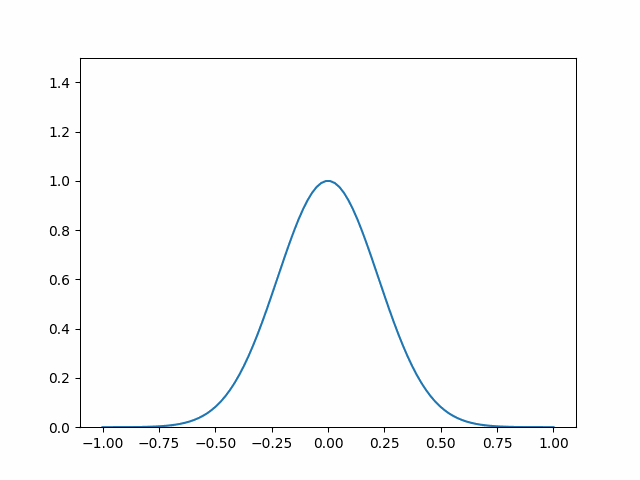

In [4]:
u = u0(np.linspace(-1, 1, 100))

def burgers(x):
    return x ** 2 / 2

# Animate the solution
@animate
def animation():
    for i in range(100000):
        finite_diff_step(u, burgers, .00001)

        if i % 1000 == 0:
            plt.plot(np.linspace(-1, 1, 100), u)
            plt.ylim(0, 1.5)
            
            yield

animation()

We can see that the shock causes large oscillations to form across our solution. Lets take a quick sneak preview at DG:

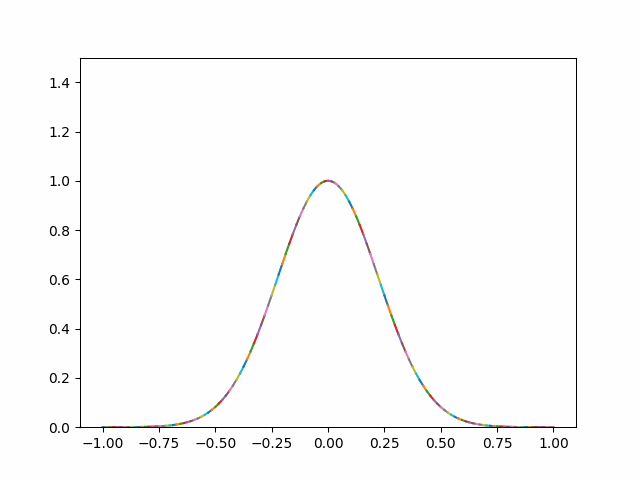

In [5]:
from prelims import DGPrelims

dg = DGPrelims(4, 128)

u = u0(dg.x)

dg_RHS = lambda x: dg.RHS(burgers, x)

# Animate the solution
@animate
def animation():
    global u
    for i in range(100000):
        u += .00001 * dg_RHS(u)

        if i % 1000 == 0:
            plt.plot(dg.x, u)
            plt.ylim(0, 1.5)
            
            yield

animation()